In [140]:
%pip install PyPDF2
from pypdf import PdfReader

%pip install aiofiles

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\alnaf\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\alnaf\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [141]:

# Reader  = PdfReader ('The Journal of Finance - 2023 - HASSAN - The Global Impact of Brexit Uncertainty.pdf')
# print(len(Reader .pages))
# page = Reader.pages[1] # first page
# print(page.extract_text())
# page = page.count('Brexit')

Official Working code - count words in a page and outputs count of the word. 

In [142]:
# from PyPDF2 import PdfReader
# import json

# def extract_text_from_pdf(file_path):
#     try:
#         # Synchronously read the PDF file
#         with open(file_path, 'rb') as file:
#             reader = PdfReader(file)
#             results = []
#             # Process only the first two pages
#             for i in range(min(45, len(reader.pages))):
#                 page = reader.pages[i]
#                 text = page.extract_text()
#                 count = text.count('Brexit')
#                 results.append({
#                     "page_number": i + 1,
#                     "occurrences_of_brexit": count,
#                     "extracted_text": text
#                 })
#             return results

#     except FileNotFoundError:
#         return f"Error: The file {file_path} was not found."
#     except OSError:
#         return f"Error: Could not read the file {file_path}. It may be corrupted or unreadable."
#     except Exception as e:
#         return f"An unexpected error occurred: {str(e)}"

# def save_results_to_json(results, output_path):
#     if isinstance(results, str):
#         print(results)  # Print error messages directly
#     else:
#         with open(output_path, 'w') as file:
#             json.dump(results, file, indent=4)
#         print(f"Results saved to {output_path}")

# def process_pdf_file():
#     file_path = 'The Journal of Finance - 2023 - HASSAN - The Global Impact of Brexit Uncertainty.pdf'
#     output_path = 'results.json'
#     results = extract_text_from_pdf(file_path)
#     save_results_to_json(results, output_path)

# # Run the function
# process_pdf_file()


below is the code that works for the problem statement. 

```python

In [143]:
# import matplotlib.pyplot as plt
# from PyPDF2 import PdfReader
# import json

# def extract_text_from_pdf(file_path, keywords):
#     try:
#         with open(file_path, 'rb') as file:
#             reader = PdfReader(file)
#             results = []
#             total_occurrences = {word: 0 for word in keywords}  # Initialize total counts
#             for i in range(min(45, len(reader.pages))):
#                 page = reader.pages[i]
#                 text = page.extract_text()
#                 page_counts = {word: text.count(word) for word in keywords}
#                 for word, count in page_counts.items():
#                     total_occurrences[word] += count  # Add to total count
#                 results.append({
#                     "page_number": i + 1,
#                     "word_counts": page_counts,
#                     "extracted_text": text
#                 })
#             return results, total_occurrences

#     except FileNotFoundError:
#         return f"Error: The file {file_path} was not found.", {}
#     except OSError:
#         return f"Error: Could not read the file {file_path}. It may be corrupted or unreadable.", {}
#     except Exception as e:
#         return f"An unexpected error occurred: {str(e)}", {}

# def save_results_to_json(results, output_path):
#     if isinstance(results, str):
#         print(results)  # Print error messages directly
#     else:
#         with open(output_path, 'w') as file:
#             json.dump(results, file, indent=4)
#         print(f"Results saved to {output_path}")

# def plot_occurrences(total_occurrences):
#     words = list(total_occurrences.keys())
#     counts = list(total_occurrences.values())
    
#     plt.figure(figsize=(10, 6))
    
#     colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']  # Professional color scheme with more colors
#     wedges, texts, autotexts = plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140, colors=colors)
    
#     for text in texts:
#         text.set_fontsize(12)
#     for autotext in autotexts:
#         autotext.set_fontsize(12)
#         autotext.set_color('white')
#         autotext.set_weight('bold')
    
#     plt.title('Occurrences of Keywords in PDF', fontsize=14, weight='bold', pad=20)
#     plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
#     plt.legend(wedges, words, title="Keywords", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
#     plt.show()

# def process_pdf_file():
#     file_path = 'The Journal of Finance - 2023 - HASSAN - The Global Impact of Brexit Uncertainty.pdf'
#     output_path = 'results.json'
#     keywords = ["Brexit", "EU", "Sentiment", "Trade", "Risk", "Uncertainty"]
#     results, total_occurrences = extract_text_from_pdf(file_path, keywords)
#     save_results_to_json(results, output_path)
#     print("Total occurrences:")
#     for word, count in total_occurrences.items():
#         print(f"{word}: {count}")
#     plot_occurrences(total_occurrences)

# # Run the function
# process_pdf_file()


////test against the sample test cases. 

```python

/DOWN TO THE CODE 
python Accumulate the count of words in a page and output the count of the word.

In [144]:
# import matplotlib.pyplot as plt
# from PyPDF2 import PdfReader
# import json
# import os
# import csv
# from tabulate import tabulate

# def extract_text_from_pdf(file_path, keywords):
#     try:
#         with open(file_path, 'rb') as file:
#             reader = PdfReader(file)
#             total_occurrences = {category: {word: 0 for word in words} for category, words in keywords.items()}
#             for i in range(len(reader.pages)):  # Iterate over all pages
#                 page = reader.pages[i]
#                 text = page.extract_text()
#                 for category, words in keywords.items():
#                     for word in words:
#                         total_occurrences[category][word] += text.count(word)
#             return total_occurrences

#     except FileNotFoundError:
#         return f"Error: The file {file_path} was not found."
#     except OSError:
#         return f"Error: Could not read the file {file_path}. It may be corrupted or unreadable."
#     except Exception as e:
#         return f"An unexpected error occurred: {str(e)}"

# def read_cumulative_counts(file_path):
#     if os.path.exists(file_path):
#         with open(file_path, 'r') as file:
#             return json.load(file)
#     else:
#         return {"Physical exposure": {}, "Policy related": {}}

# def save_cumulative_counts(counts, file_path):
#     with open(file_path, 'w') as file:
#         json.dump(counts, file, indent=4)
#     print(f"Cumulative counts saved to {file_path}")

# def convert_json_to_csv(json_file_path, csv_file_path):
#     with open(json_file_path, 'r') as json_file:
#         data = json.load(json_file)
    
#     with open(csv_file_path, 'w', newline='') as csv_file:
#         writer = csv.writer(csv_file)
#         writer.writerow(["Category", "Keyword", "Count"])
        
#         for category, words in data.items():
#             for word, count in words.items():
#                 writer.writerow([category, word, count])
#     print(f"CSV file saved to {csv_file_path}")

# def plot_bar_chart(total_occurrences):
#     for category, words in total_occurrences.items():
#         words_list = list(words.keys())
#         counts = list(words.values())

#         plt.figure(figsize=(12, 6))
#         plt.bar(words_list, counts, color='skyblue')
#         plt.xlabel('Keywords')
#         plt.ylabel('Occurrences')
#         plt.title(f'Occurrences of Keywords in {category}')
#         plt.xticks(rotation=90)
#         plt.tight_layout()
#         plt.show()

# def print_excel_style_table(total_occurrences):
#     table_data = []
#     for category, words in total_occurrences.items():
#         for word, count in words.items():
#             table_data.append([category, word, count])
#     headers = ["Category", "Keyword", "Count"]
#     print(tabulate(table_data, headers, tablefmt="pipe"))

# def process_pdf_file():
#     file_path = 'Reports/LSE/Annual reports/LSE_ULVR_2023.pdf'
#     cumulative_counts_path = 'cumulative_counts.json'
#     csv_file_path = 'cumulative_counts.csv'
#     keywords = {
#         "Physical exposure": [
#             "climate change", "weather", "extreme weather", "weather events", "Warming", "Temperature",
#             "Extreme temperature", "heatwave", "heating season", "severe winter", "mild winter", 
#             "normal winter", "winter conditions", "coldwave", "Flooding", "the flood", "the floods", 
#             "tsunami", "high water", "drought", "droughts", "water scarcity", "water stress", 
#             "precipitation", "rainfall", "Physical Environmental", "hurricane", "hurricanes", 
#             "storms", "storm related", "storm losses", "storm activity", "tropical storm", "the snow", 
#             "snowfall", "snowstorm", "the ice", "wildfire", "wildfires", "air quality", "air pollutants", 
#             "degree days", "polar vortex", "greenhouse gas", "task force"
#         ],
#         "Policy related": [
#             "Carbon tax", "Voluntary removal costs", "Net zero", "Net-zero", "Net-zero GHG emissions", 
#             "Forest", "Energy transition", "Adaptation", "Mitigation" "TCFD"
#         ]
#     }
    
#     current_run_counts = extract_text_from_pdf(file_path, keywords)
    
#     if isinstance(current_run_counts, str):
#         print(current_run_counts)  # Print error messages directly
#         return
    
#     cumulative_counts = read_cumulative_counts(cumulative_counts_path)
    
#     # Ensure cumulative_counts structure is correct
#     for category in keywords:
#         if category not in cumulative_counts:
#             cumulative_counts[category] = {}
#         for word in keywords[category]:
#             if word not in cumulative_counts[category]:
#                 cumulative_counts[category][word] = 0

#     # Update cumulative counts with current run counts
#     for category, words in current_run_counts.items():
#         for word, count in words.items():
#             cumulative_counts[category][word] += count
    
#     save_cumulative_counts(cumulative_counts, cumulative_counts_path)
    
#     print("Cumulative occurrences:")
#     for category, words in cumulative_counts.items():
#         print(f"\n{category}:")
#         for word, count in words.items():
#             print(f"{word}: {count}")
    
#     print_excel_style_table(cumulative_counts)
    
#     plot_bar_chart(cumulative_counts)
    
#     # Convert JSON to CSV
#     convert_json_to_csv(cumulative_counts_path, csv_file_path)

# # Run the function
# process_pdf_file()


Down -> Single Line words - JSON

In [145]:
# import matplotlib.pyplot as plt
# from PyPDF2 import PdfReader
# import json
# import os
# from tabulate import tabulate

# def extract_text_from_pdf(file_path, keywords):
#     try:
#         with open(file_path, 'rb') as file:
#             reader = PdfReader(file)
#             total_occurrences = {word: 0 for word in keywords}  # Initialize total counts
#             for i in range(len(reader.pages)):  # Iterate over all pages
#                 page = reader.pages[i]
#                 text = page.extract_text()
#                 for word in keywords:
#                     total_occurrences[word] += text.count(word)
#             return total_occurrences

#     except FileNotFoundError:
#         return f"Error: The file {file_path} was not found."
#     except OSError:
#         return f"Error: Could not read the file {file_path}. It may be corrupted or unreadable."
#     except Exception as e:
#         return f"An unexpected error occurred: {str(e)}"

# def save_counts(counts, file_path):
#     with open(file_path, 'w') as file:
#         json.dump(counts, file, indent=4)
#     print(f"Counts saved to {file_path}")

# def plot_bar_chart(total_occurrences):
#     words_list = list(total_occurrences.keys())
#     counts = list(total_occurrences.values())

#     plt.figure(figsize=(12, 6))
#     plt.bar(words_list, counts, color='skyblue')
#     plt.xlabel('Keywords')
#     plt.ylabel('Occurrences')
#     plt.title('Occurrences of Keywords')
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.show()

# def print_table_format(total_occurrences):
#     table_data = [[word, count] for word, count in total_occurrences.items()]
#     headers = ["Keyword", "Count"]
#     print(tabulate(table_data, headers, tablefmt="grid"))

# def process_pdf_file():
#     file_path = 'Reports/LSE/Annual reports/LSE_ULVR_2021.pdf'
#     counts_path = 'cumulative_counts.json'
#     keywords = [
#         "climate change", "weather", "extreme weather", "weather events", "Warming", "Temperature",
#         "Extreme temperature", "heatwave", "heating season", "severe winter", "mild winter", 
#         "normal winter", "winter conditions", "coldwave", "Flooding", "the flood", "the floods", 
#         "tsunami", "high water", "drought", "droughts", "water scarcity", "water stress", 
#         "precipitation", "rainfall", "Physical Environmental", "hurricane", "hurricanes", 
#         "storms", "storm related", "storm losses", "storm activity", "tropical storm", "the snow", 
#         "snowfall", "snowstorm", "the ice", "wildfire", "wildfires", "air quality", "air pollutants", 
#         "degree days", "polar vortex", "greenhouse gas", "task force", "Carbon tax", "Voluntary removal costs",
#         "Net zero", "Net-zero", "Net-zero GHG emissions", "Forest", "Energy transition", "Adaptation", 
#         "Mitigation", "TCFD"
#     ]
    
#     current_run_counts = extract_text_from_pdf(file_path, keywords)
    
#     if isinstance(current_run_counts, str):
#         print(current_run_counts)  # Print error messages directly
#         return
    
#     save_counts(current_run_counts, counts_path)
    
#     print("Current occurrences:")
#     for word, count in current_run_counts.items():
#         print(f"{word}: {count}")
    
#     print_table_format(current_run_counts)
    
#     plot_bar_chart(current_run_counts)

# # Run the function
# process_pdf_file()


New Formula -> Count of the words in the page. pymupdf

```python

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alnaf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alnaf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Counts saved to cumulative_counts.json
Current occurrences:
climate change: 5
weather: 1
extreme weather: 0
weather events: 0
warming: 0
temperature: 0
extreme temperature: 0
heatwave: 0
heating season: 0
severe winter: 0
mild winter: 0
normal winter: 0
winter conditions: 0
coldwave: 0
flooding: 0
the flood: 0
the floods: 0
tsunami: 0
high water: 0
drought: 1
droughts: 0
water scarcity: 2
water stress: 0
precipitation: 0
rainfall: 0
physical environmental: 0
hurricane: 0
hurricanes: 0
storms: 0
storm related: 0
storm losses: 0
storm activity: 0
tropical storm: 0
the snow: 0
snowfall: 0
snowstorm: 0
the ice: 0
wildfire: 0
wildfires: 0
air quality: 0
air pollutants: 0
degree days: 0
polar vortex: 0
greenhouse gas: 12
task force: 1
carbon tax: 0
voluntary removal costs: 0
net zero: 0
net-zero: 0
net-zero ghg emissions: 0
forest: 9
energy transition: 0
adaptation: 0
mitigation: 1
tcfd: 0
+-------------------------+---------+
| Keyword                 |   Count |
+=========================+

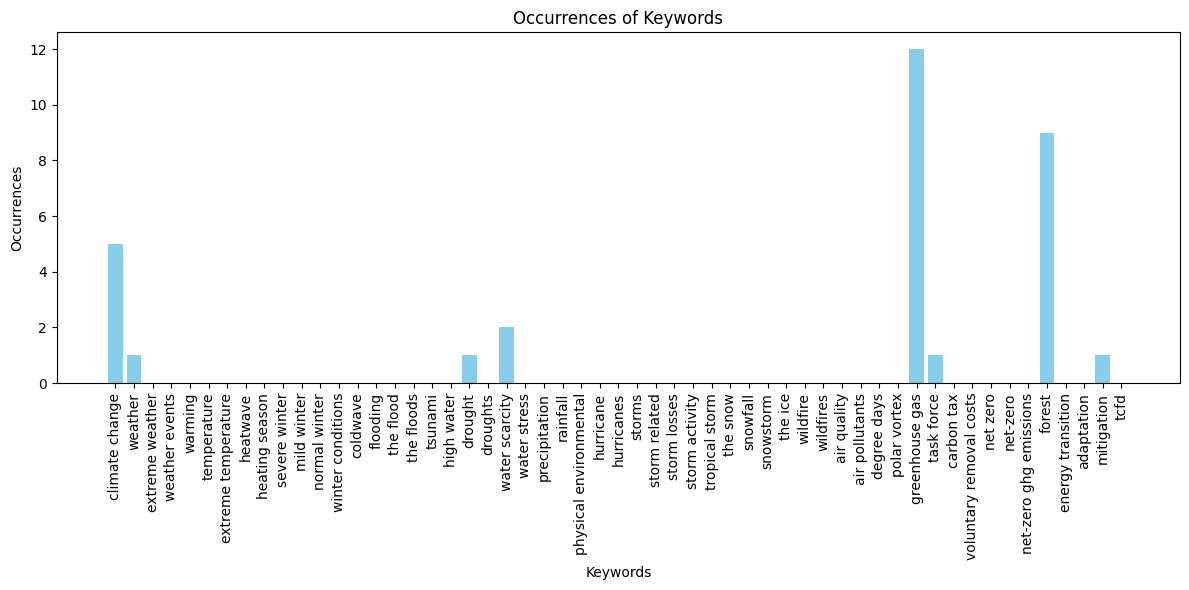

In [146]:
import matplotlib.pyplot as plt
import json
import os
import re
import fitz  # PyMuPDF
from tabulate import tabulate
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Ensure you have the necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back to a single string
    return ' '.join(words)

def extract_text_from_pdf(file_path, keywords):
    try:
        document = fitz.open(file_path)
        total_occurrences = {word: 0 for word in keywords}  # Initialize total counts

        for page_num in range(len(document)):
            page = document.load_page(page_num)
            text = page.get_text("text")

            # Preprocess the text
            text = preprocess_text(text)

            for word in keywords:
                # Use regular expressions for precise matching
                regex = re.compile(r'\b' + re.escape(word) + r'\b', re.IGNORECASE)
                total_occurrences[word] += len(regex.findall(text))

        return total_occurrences

    except FileNotFoundError:
        return f"Error: The file {file_path} was not found."
    except Exception as e:
        return f"An unexpected error occurred: {str(e)}"

def save_counts(counts, file_path):
    with open(file_path, 'w') as file:
        json.dump(counts, file, indent=4)
    print(f"Counts saved to {file_path}")

def plot_bar_chart(total_occurrences):
    words_list = list(total_occurrences.keys())
    counts = list(total_occurrences.values())

    plt.figure(figsize=(12, 6))
    plt.bar(words_list, counts, color='skyblue')
    plt.xlabel('Keywords')
    plt.ylabel('Occurrences')
    plt.title('Occurrences of Keywords')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def print_table_format(total_occurrences):
    table_data = [[word, count] for word, count in total_occurrences.items()]
    headers = ["Keyword", "Count"]
    print(tabulate(table_data, headers, tablefmt="grid"))

def process_pdf_file():
    file_path = 'Reports/LSE/Annual reports/LSE_ULVR_2013.pdf'
    counts_path = 'cumulative_counts.json'
    keywords = [
        "climate change", "weather", "extreme weather", "weather events", "warming", "temperature",
        "extreme temperature", "heatwave", "heating season", "severe winter", "mild winter", 
        "normal winter", "winter conditions", "coldwave", "flooding", "the flood", "the floods", 
        "tsunami", "high water", "drought", "droughts", "water scarcity", "water stress", 
        "precipitation", "rainfall", "physical environmental", "hurricane", "hurricanes", 
        "storms", "storm related", "storm losses", "storm activity", "tropical storm", "the snow", 
        "snowfall", "snowstorm", "the ice", "wildfire", "wildfires", "air quality", "air pollutants", 
        "degree days", "polar vortex", "greenhouse gas", "task force", "carbon tax", "voluntary removal costs",
        "net zero", "net-zero", "net-zero ghg emissions", "forest", "energy transition", "adaptation", 
        "mitigation", "tcfd"
    ]
    
    current_run_counts = extract_text_from_pdf(file_path, keywords)
    
    if isinstance(current_run_counts, str):
        print(current_run_counts)  # Print error messages directly
        return
    
    save_counts(current_run_counts, counts_path)
    
    print("Current occurrences:")
    for word, count in current_run_counts.items():
        print(f"{word}: {count}")
    
    print_table_format(current_run_counts)
    
    plot_bar_chart(current_run_counts)

# Run the function
process_pdf_file()
